# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

# Submitted by Michael I 5936

In [1]:
# stundent details example: John S. 9812
#                       student details 1: Michael I 5936
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:ChatGPT
Goal:helping to plot correlations based on heat map
Propmpt1: https://chatgpt.com/share/682372cd-19bc-800f-b4a6-598de2e4a285
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:Grok
Goal:finding Cross Validation grid search and k-fold syntax using my model 
Propmpt1:   https://grok.com/chat/c1b0c8de-b8bc-425d-9904-46dde6cee4b5  how to create Cross validation grid search and
            split data to k-fold validation groups
    
Propmpt2:   https://grok.com/share/bGVnYWN5_ca8ad480-0e14-4ff5-b6ba-ee89d7150dd1 how to create Confusion matrix for my test                 predictions 
    
Propmpt3:
Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
Wine Dataset , Wine classification into 3 different classes 
Model methods: K-NN 
Scaling Methods: Z-score
Feature Engineering: PCA for KNN
Hyper Parameters Search using grid search and k-fold combinations splitting train data
and choosing best method of distance metric, PCA components, K parameters
using f1 cross validation method.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [39]:
import string
import re
import math
import statistics
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [40]:
def load_dataset(X_file,Y_file, category_col_name):
    X_train = pd.read_csv(X_file)
    X_test = pd.read_csv(Y_file)
    Y_train = X_train[category_col_name]
    X_train = X_train.drop(columns=[category_col_name])
    Y_test = X_test[category_col_name]
    X_test = X_test.drop(columns=[category_col_name])
    return X_train, Y_train, X_test, Y_test

In [41]:
X_file = 'wine_train.csv'
Y_file = 'wine_test.csv'
category_col_name = 'target'
x_train, y_train , x_test, y_test = load_dataset(X_file,Y_file,category_col_name)
x_train.head()
x_test.head()
y_train.head()
x_train.describe(include='all')
x_train.dtypes

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


0    1
1    2
2    1
3    1
4    2
Name: target, dtype: int64

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000


alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Wine Features')

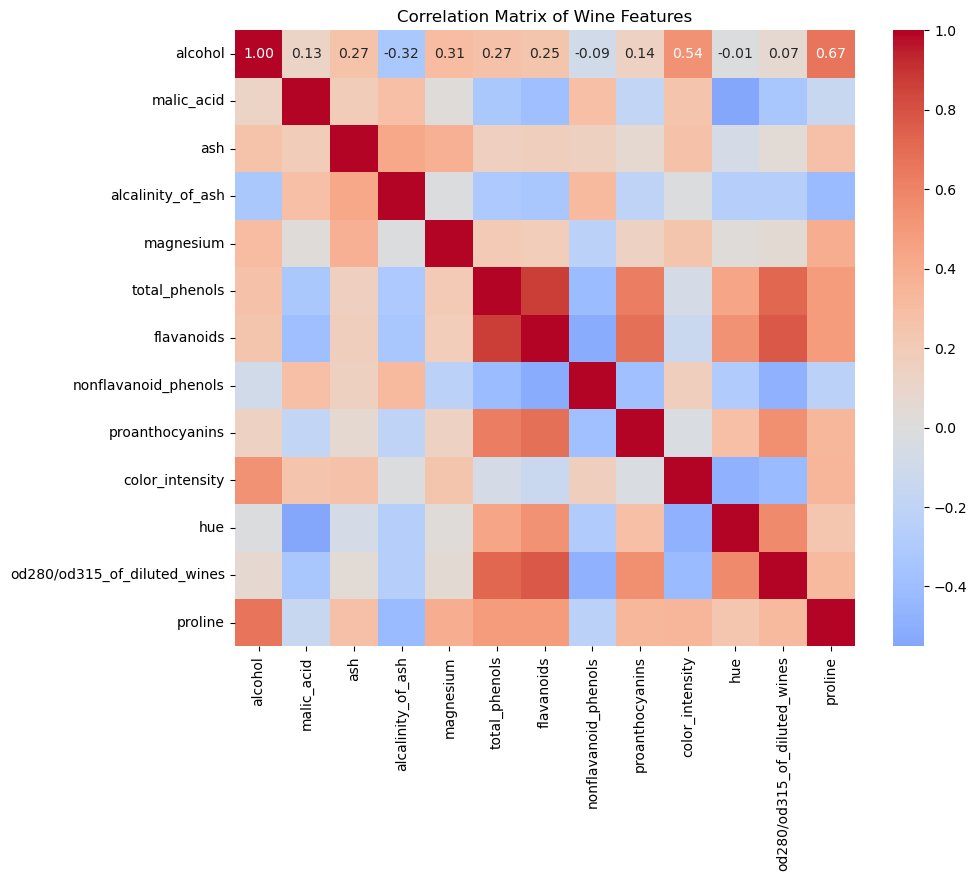

In [42]:
corr_matrix = x_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()


<Axes: xlabel='flavanoids', ylabel='total_phenols'>

Text(0.5, 1.0, 'Flavanoids vs Total Phenols')

<Axes: xlabel='flavanoids', ylabel='od280/od315_of_diluted_wines'>

Text(0.5, 1.0, 'Flavanoids vs OD280/OD315 of Diluted Wines')

<Axes: xlabel='alcohol', ylabel='proline'>

Text(0.5, 1.0, 'Alcohol vs Proline')

<Axes: xlabel='color_intensity', ylabel='hue'>

Text(0.5, 1.0, 'Color Intensity vs Hue')

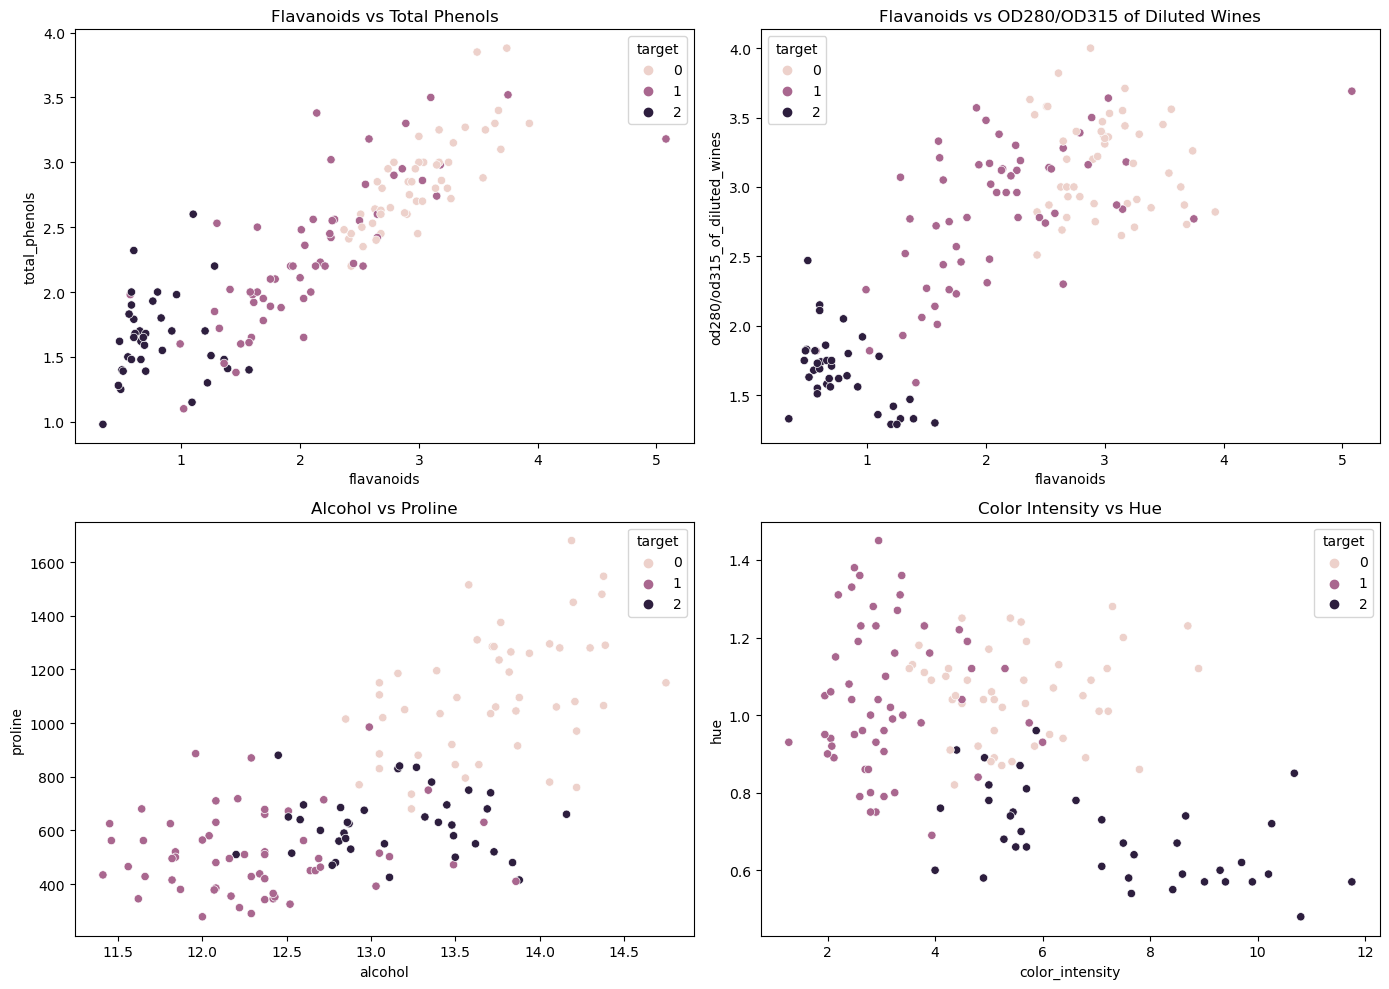

In [43]:

x_train_vis = x_train.copy(deep=True)
x_train_vis['target'] = y_train
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Flavanoids vs Total Phenols
sns.scatterplot(data=x_train_vis, x='flavanoids', y='total_phenols',hue='target', ax=axs[0, 0])
axs[0, 0].set_title('Flavanoids vs Total Phenols')

# 2. Flavanoids vs OD280/OD315_of_diluted_wines
sns.scatterplot(data=x_train_vis, x='flavanoids', y='od280/od315_of_diluted_wines',hue='target', ax=axs[0, 1])
axs[0, 1].set_title('Flavanoids vs OD280/OD315 of Diluted Wines')

# 3. Alcohol vs Proline
sns.scatterplot(data=x_train_vis, x='alcohol', y='proline',hue='target', ax=axs[1, 0])
axs[1, 0].set_title('Alcohol vs Proline')

# 4. Color Intensity vs Hue
sns.scatterplot(data=x_train_vis, x='color_intensity', y='hue',hue='target', ax=axs[1, 1])
axs[1, 1].set_title('Color Intensity vs Hue')

plt.tight_layout()
plt.show()

In [44]:
def fit_train(train_set, category_col_name, y_train):
    train_set_Copy = train_set.copy(deep=True)
    mean = train_set.mean()
    std = train_set.std()
    train_set_Copy = (train_set - mean) / std
    return train_set_Copy, mean, std

def fit_test(test_set, y_test, train_mean, train_std):
    test_set_Copy = test_set.copy(deep=True)
    test_set_Copy = (test_set - train_mean) / train_std
    return test_set_Copy

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.161182,-0.427823,-0.147195,-0.274149,-1.384391,-1.119657,-0.560619,1.474197,0.144365,-1.174415,0.552912,-0.513692,-0.827288
1,0.737719,0.258163,1.159159,1.514325,0.369514,-1.197847,-1.217138,0.368399,-0.040485,1.620736,-0.995139,-1.168213,0.023774
2,-0.794062,-1.241860,-3.536654,-2.628973,-0.872835,-0.525414,-1.485714,-0.567275,-2.110806,-1.375344,0.416319,-1.140361,-0.701204
3,-1.490325,-0.528435,-1.700697,0.023930,-1.018994,0.287761,-0.421357,0.198277,-0.262305,-1.326228,-0.084521,-0.276950,-1.032173
4,0.206026,1.163664,-0.747412,0.471049,0.150276,-1.276037,-1.505608,0.708645,-0.484125,-0.459999,-1.632572,-1.335324,0.275940


<Axes: xlabel='flavanoids', ylabel='total_phenols'>

Text(0.5, 1.0, 'Flavanoids vs Total Phenols')

<Axes: xlabel='flavanoids', ylabel='od280/od315_of_diluted_wines'>

Text(0.5, 1.0, 'Flavanoids vs OD280/OD315 of Diluted Wines')

<Axes: xlabel='alcohol', ylabel='proline'>

Text(0.5, 1.0, 'Alcohol vs Proline')

<Axes: xlabel='color_intensity', ylabel='hue'>

Text(0.5, 1.0, 'Color Intensity vs Hue')

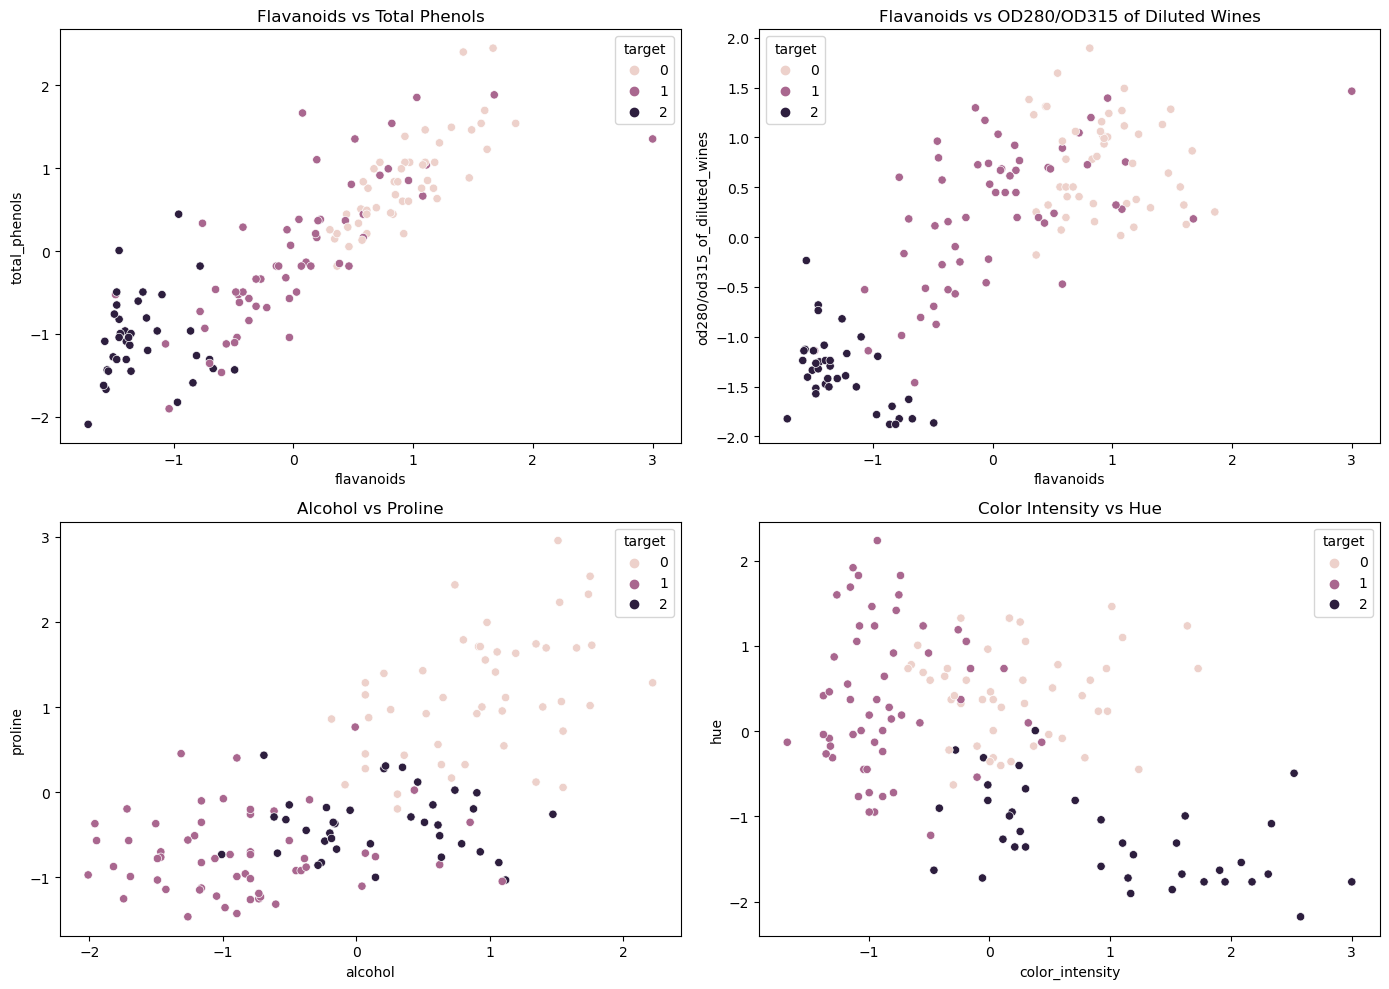

In [45]:
X_train_normalized, mean , std = fit_train(x_train,category_col_name,y_train)
X_train_normalized.head()

x_train_vis1 = X_train_normalized.copy(deep=True)
x_train_vis1['target'] = y_train

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Flavanoids vs Total Phenols
sns.scatterplot(data=x_train_vis1, x='flavanoids', y='total_phenols',hue='target', ax=axs[0, 0])
axs[0, 0].set_title('Flavanoids vs Total Phenols')

# 2. Flavanoids vs OD280/OD315_of_diluted_wines
sns.scatterplot(data=x_train_vis1, x='flavanoids', y='od280/od315_of_diluted_wines',hue='target', ax=axs[0, 1])
axs[0, 1].set_title('Flavanoids vs OD280/OD315 of Diluted Wines')

# 3. Alcohol vs Proline
sns.scatterplot(data=x_train_vis1, x='alcohol', y='proline',hue='target', ax=axs[1, 0])
axs[1, 0].set_title('Alcohol vs Proline')

# 4. Color Intensity vs Hue
sns.scatterplot(data=x_train_vis1, x='color_intensity', y='hue',hue='target', ax=axs[1, 1])
axs[1, 1].set_title('Color Intensity vs Hue')

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Wine Features scaled')

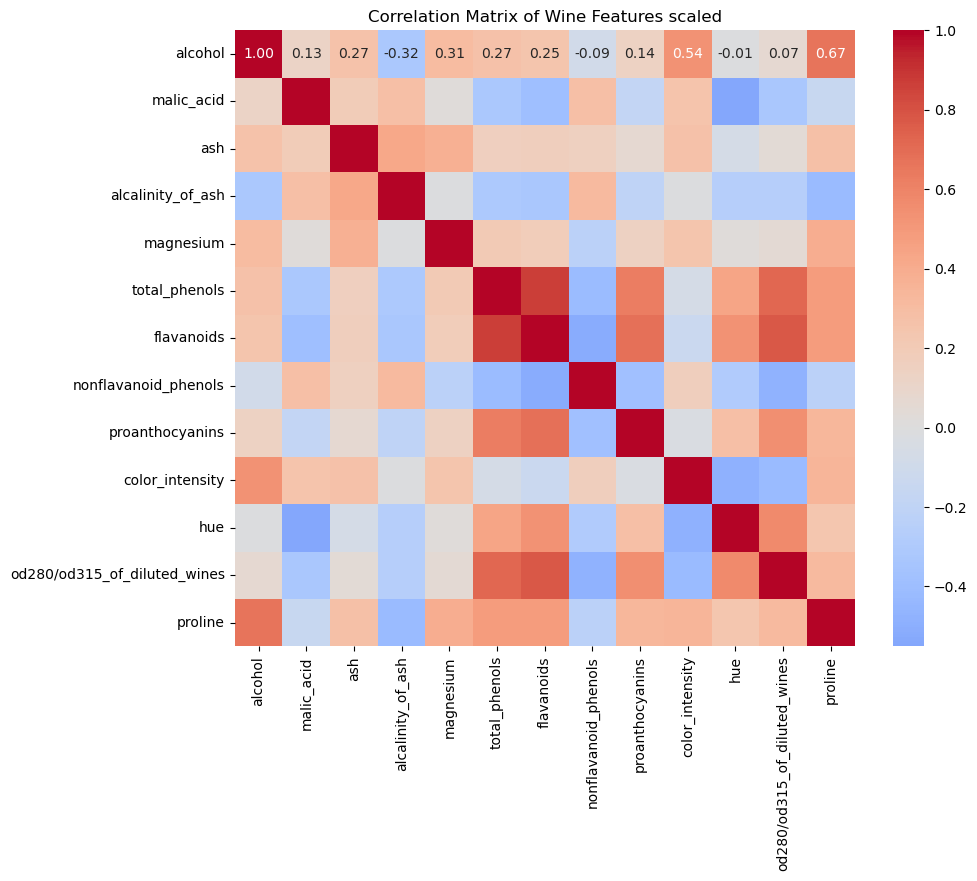

In [53]:




corr_matrix = X_train_normalized.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Wine Features scaled')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [47]:
def Calc_Distance(X_train_feature,X_test_feature,Method):
    if Method == 'Euclidean':
        return np.sqrt(np.sum((X_train_feature - X_test_feature) ** 2))
    if Method == 'Minikowski':
        p=3
        return np.power(np.sum(np.abs(X_train_feature - X_test_feature) ** p), 1/p)
    if Method == 'Manhattan':
        return np.sum(np.abs(X_train_feature - X_test_feature))


In [48]:
def load_df_distance(X_train_normalized,X_test_normalized,y_train):
    df_euclidean = pd.DataFrame({'distance':np.zeros(len(y_train)),'y_train':y_train.values})
    return df_euclidean , 'distance'

In [49]:
def ClassElement(y_train):
    return sorted(np.unique(y_train))

In [50]:
def predict(df_euclidean_distance,col_name,element_lst,k):
    df_sorted = df_euclidean_distance.sort_values(by=col_name, ascending=True).head(k)
    # Count occurrences of each class in top k neighbors
    class_counts = pd.Series(0, index=element_lst, dtype=float)

    # Update class_counts with actual counts from top k neighbors
    actual_counts = df_sorted['y_train'].value_counts()
    for cls in actual_counts.index:
        if cls in class_counts.index:
            class_counts[cls] = actual_counts[cls]


    return class_counts.idxmax()

In [51]:
def KNN(X_train_normalized,X_test_normalized,y_train,k,distance_method,pca_n):
    pca = PCA(n_components=pca_n)  # Keep 95% of variance
    x_train_pca = pca.fit_transform(X_train_normalized)
    x_test_pca = pca.transform(X_test_normalized)
    X_train_normalized = pd.DataFrame(x_train_pca)
    X_test_normalized = pd.DataFrame(x_test_pca)
    df_distance , df_e_col = load_df_distance(X_train_normalized,X_test_normalized,y_train)
    X_Predict = X_test_normalized.copy(deep=True)
    X_Predict['y_predict'] = np.nan
    element_lst = ClassElement(y_train)
    x_testsize = X_test_normalized.shape[0]
    df_distancesize = df_distance.shape[0]
    for j in range(x_testsize):
        test_instance = X_test_normalized.iloc[j]
        for i in range(df_distancesize):
            train_instance = X_train_normalized.iloc[i]
            df_distance.loc[i,df_e_col] = Calc_Distance(train_instance,test_instance,distance_method)
        X_Predict.loc[j,'y_predict'] = predict(df_distance,df_e_col,element_lst,k)
    return X_Predict

In [52]:
Distance_Hyper_Parameters = {'Euclidean','Minikowski','Manhattan'}
K_Hyper_Parameters = {3, 5,7, 9}
PCI_Components = {2 , 0.95, 0.9}
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for pci_comp in PCI_Components:
    for dist_param in Distance_Hyper_Parameters:
        for k in K_Hyper_Parameters:
            f1_scores = []
            for train_idx, val_idx in kf.split(X_train_normalized):
                # Split data into train and validation folds
                X_train_fold = X_train_normalized.iloc[train_idx]
                y_train_fold = y_train.iloc[train_idx] if isinstance(y_train, pd.Series) else y_train[train_idx]
                X_val_fold = X_train_normalized.iloc[val_idx]
                y_val_fold = y_train.iloc[val_idx] if isinstance(y_train, pd.Series) else y_train[val_idx]
                
                # Run KNN on the fold
                X_Predict = KNN(X_train_fold,
                    X_val_fold,
                    y_train_fold,
                    k,
                    dist_param,
                    pca_n=pci_comp
                )
                
                # Extract predictions
                y_pred = X_Predict['y_predict']
                
                # Compute macro-average F1 score
                f1 = f1_score(y_val_fold, y_pred, average='macro')
                f1_scores.append(f1)
            
            # Compute mean F1 score across folds
            mean_f1 = np.mean(f1_scores)
            
            # Store results
            results.append({
                'PCA_Components': pci_comp,
                'Distance_Method': dist_param,
                'K': k,
                'Mean_Macro_F1': mean_f1
            })
            
          # Print progress
            print(f"PCA={pci_comp}, Distance={dist_param}, K={k}, Mean Macro F1={mean_f1:.4f}")

# Create summary table
results_df = pd.DataFrame(results)

# Sort by Mean_Macro_F1 in descending order
results_df = results_df.sort_values(by='Mean_Macro_F1', ascending=False)

# Display summary table
print("\nSummary Table of Hyperparameter Performance (5-Fold Cross-Validation):")
print(results_df)

# Identify best hyperparameters
best_params = results_df.iloc[0]
print("\nBest Hyperparameters:")
print(f"PCA Components: {best_params['PCA_Components']}")
print(f"Distance Method: {best_params['Distance_Method']}")
print(f"K: {best_params['K']}")
print(f"Mean Macro F1 Score: {best_params['Mean_Macro_F1']:.4f}")

# Save summary table to CSV (optional)
results_df.to_csv('knn_grid_search_results.csv', index=False)


PCA=0.95, Distance=Euclidean, K=9, Mean Macro F1=0.9489
PCA=0.95, Distance=Euclidean, K=3, Mean Macro F1=0.9481
PCA=0.95, Distance=Euclidean, K=5, Mean Macro F1=0.9615
PCA=0.95, Distance=Euclidean, K=7, Mean Macro F1=0.9596
PCA=0.95, Distance=Manhattan, K=9, Mean Macro F1=0.9553
PCA=0.95, Distance=Manhattan, K=3, Mean Macro F1=0.9711
PCA=0.95, Distance=Manhattan, K=5, Mean Macro F1=0.9577
PCA=0.95, Distance=Manhattan, K=7, Mean Macro F1=0.9642
PCA=0.95, Distance=Minikowski, K=9, Mean Macro F1=0.9547
PCA=0.95, Distance=Minikowski, K=3, Mean Macro F1=0.9481
PCA=0.95, Distance=Minikowski, K=5, Mean Macro F1=0.9394
PCA=0.95, Distance=Minikowski, K=7, Mean Macro F1=0.9547
PCA=0.9, Distance=Euclidean, K=9, Mean Macro F1=0.9698
PCA=0.9, Distance=Euclidean, K=3, Mean Macro F1=0.9545
PCA=0.9, Distance=Euclidean, K=5, Mean Macro F1=0.9481
PCA=0.9, Distance=Euclidean, K=7, Mean Macro F1=0.9634
PCA=0.9, Distance=Manhattan, K=9, Mean Macro F1=0.9642
PCA=0.9, Distance=Manhattan, K=3, Mean Macro F1=0

# Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)
DF-engineering

In [20]:
X_test_normalized = fit_test(x_test,y_test,mean,std)
Method = 'Manhattan'
pca_n = 0.95
k=3


## Part 5 - Apply on test and show model performance estimation

In [29]:
X_test_Predict = KNN(X_train_normalized, X_test_normalized, y_train, k , Method, pca_n=pca_n)
X_test_Predict.head()
y_pred = X_test_Predict['y_predict']
y_unique_lst = ClassElement(y_train)
comparison = pd.DataFrame({'Predicted': y_pred,'Actual': y_test,'Correct': y_pred == y_test})
comparison

,0,1,2,3,4,5,6,7,8,9,y_predict
0,3.026512,-1.581812,-1.023853,0.085940,-0.307911,0.678595,-0.995502,-0.616933,-0.520069,0.186174,2.0
1,-2.180811,-0.112508,-1.141464,0.279499,-0.310629,-0.412056,-0.317445,-0.356806,0.089539,0.431345,0.0
2,3.656733,-1.965769,-0.085904,1.521893,-1.102793,-0.301228,1.145925,-0.338667,-0.123719,0.342277,2.0
3,-0.436563,3.749053,1.375333,-1.019397,-1.604561,0.344835,1.588745,-1.114984,-0.477426,-0.523162,1.0
4,2.647986,-1.869807,0.239478,0.463805,0.052385,-0.038339,0.093762,-0.572983,-0.094811,0.197583,2.0


,Predicted,Actual,Correct
0,2.0,2,True
1,0.0,0,True
2,2.0,2,True
3,1.0,1,True
4,2.0,2,True
5,1.0,1,True
6,0.0,0,True
7,1.0,1,True
8,0.0,1,False
9,1.0,1,True


In [38]:
macro_f1 = f1_score(y_test, y_pred, average='macro')  # Mean Macro F1 Score
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,  index=[f"True {unq}" for unq in y_unique_lst], columns=[f"Pred {unq}" for unq in y_unique_lst])
print(f"Mean Macro F1 Score: {macro_f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_df

Mean Macro F1 Score: 0.9732
Accuracy: 0.9722


,Pred 0,Pred 1,Pred 2
True 0,11,0,0
True 1,1,13,0
True 2,0,0,11
